Analysis of Economic Indicators of the UK 
---

## 1. Introduction
This project aims to analyze four CSV datasets obtained from the UK's National Statistics website (https://www.ons.gov.uk/). These datasets consist of inflation rates, unemployment rates, employment rates, and GDP growth rates from the 1990s to the 2020s. The data files will be cleaned and restructured  using appropriate code to facilitate comparison and convenience.


Project's aim is to address the following research questions.


1. What do the historical trends in economic indicators tell us?

2. Are there interconnections between these economic indicators?

3. What do economic indicators reveal about the quality of life for people in the UK?

The Python codes used in this project will closely resemble that of typical Python challenges in the course, employing _matplotlib.pyplot_ but will be slightly customized to meet the project's requirements for visualizing the results in a presentable way, including additional mathematical analyses.  

### 1.1 Importing Relevant Python Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


## 2 Research Questiions

These research questions are designed for individuals who may not be well-versed in economics but are curious to understand how inflation, the size of the UK's economy, and job availability are changing over time. They are not intended for experts or professionals in the field of economics.

### 2.1  What do the historical trends in economic indicators tell us?
Economic indicators, including the unemployment rate, employment rate, inflation rate, and GDP growth rate, will be visually shown in line graphs and analyzed through trendlines on individual plots. The trends will then be summarized in a pandas dataframe and represented graphically in a bar chart. Subsequently, an assessment will be made to determine whether these trends are overall favorable or unfavorable for the UK economy, with the results presented in a pie chart.

**Assumption**: All indicators are equally important, and the R value (correlation coefficient) provides a reasonable metric to evaluate the strength of each trend.


**Methodeology**: 
1. Create a two-column dataframe with 'Year' and the respective 'Economic Indicator' for each indicator.(see Table 1-4)
2. Generate a line graph for each indicator plotted against the years.(see Figure 1-4)
3. Incorporate trendlines into each plot.
4. Calculate the R and R-squared values.
5. Summarize the trends for each economic indicator, considering whether they are increasing or decreasing, and present these summaries in a bar chart based on the strength of the R values.(see Table 5, Figure 5)
6. Determine if the trend's direction (increase or decrease) is favorable or unfavorable, and illustrate the proportions of favorable and unfavorable trends in a pie chart, taking into account the strength of the R values. (see Figure6,7)





#### 2.1.1 Trends in unemployment rates
The **Unemployment Rate** is the percentage of people who are actively looking for a job but do not have one at the moment.

In Figure 1, it displays a clear pattern in the Unemployment Rate over the years. The line graph shows three waves, all trending downward, indicating a reduction in unemployment as time passes. The number -0.12 (the gradient or slope) signifies how rapidly unemployment is declining. The dashed black line (the trend line) confirms this decline.


The R-squared value, approximately 0.41, suggests a moderate relationship between the data points. The -0.64 (the R value or correlation coefficient) emphasizes the strength of the declining trend. 


In the related table 1, specific data supports this trend analysis, highlighting a consistent decrease in unemployment over time, which is a positive sign for the UK's economy.



In [2]:

# Load the CSV file,skipping the first 25 rows, then read 34 rows as we need to get rid other rows 
unemployment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Unemployementrates.csv", skiprows=range(1, 26), nrows=34)

# Rename columns
unemployment_df = unemployment_df.rename(columns={
    "Title": "Year",
    "Unemployment rate (aged 16 and over, seasonally adjusted): %": "Unemployment Rate"
})


unemployment_df.head()


,Year,Unemployment Rate
0,1989,7.2
1,1990,7.1
2,1991,8.9
3,1992,9.9
4,1993,10.4


   ######   Table 1: Unemployment rates listed by year
      

Gradient (Slope) = -0.12


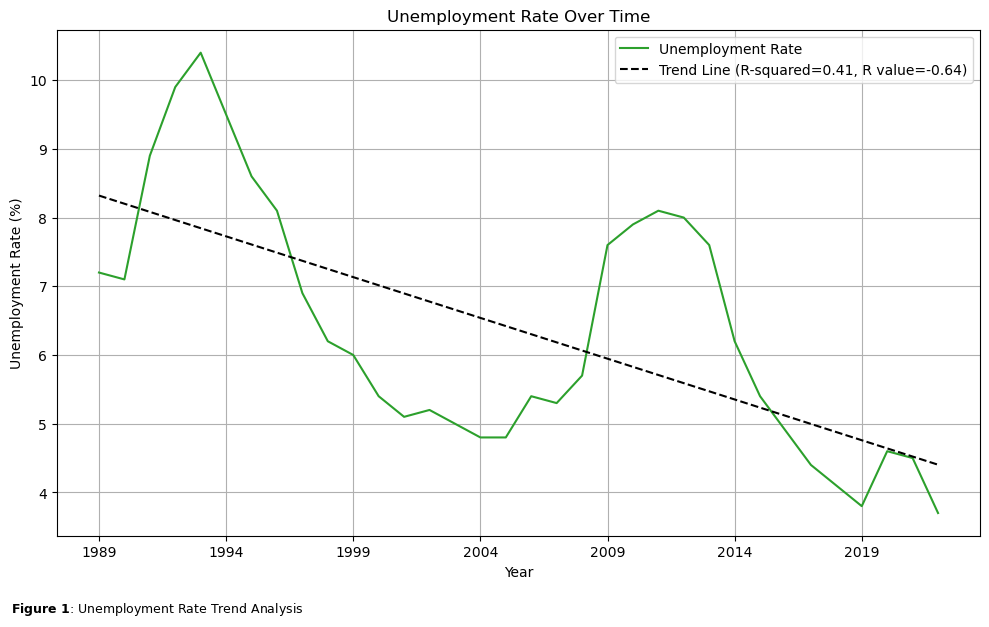

In [3]:
# Plot a line graph for the Unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(unemployment_df['Year'], unemployment_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')

# Calculate the trend line
x = unemployment_df['Year']
y = unemployment_df['Unemployment Rate']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Trend line
trend_line = slope * x + intercept
print(f'Gradient (Slope) = {slope:.2f}')

# Plot the trend line, displayed in dotted, calculate R(correlation coefficient), and R squared 
plt.plot(unemployment_df['Year'], trend_line, label=f'Trend Line (R-squared={r_value**2:.2f}, R value={r_value: .2f})'
 , linestyle='--', color='black')
# Label axis, keep grid, label, keep 5 years gap
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(unemployment_df['Year'][::5])
# Figure position adjusted as requred  ,transform=plt.gca().transAxes is used
plt.text(-0.05, -0.15, r'$\bf{Figure\ 1}$: Unemployment Rate Trend Analysis', transform=plt.gca().transAxes, fontsize=9, color='black')

plt.show()



#### 2.1.2  Trends in employment rate
The **Employment Rate** is the percentage of people in a population who have jobs. 

Figure 2 displays the Employment Rate over time, illustrating a relatively flat trend with a  positive slope. The calculated gradient (slope) is approximately 0.15, indicating a gradual increase in the Employment Rate as the years progress. The R value of approximately 0.72 suggests a moderately strong correlation, implying that the linear trend explains a substantial portion of the data's variance. The R-squared value of about 0.51 further emphasizes this moderately strong correlation, indicating an upward shift in the Employment Rate over the years. This trend has a positive impact on people, as it signifies a gradual improvement in job opportunities and economic well-being.

In [4]:

# Load the CSV file,skipping the first 25 rows, then read 34 rows as we need to get rid other rows 
employment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Employement rates.csv", skiprows=range(1, 26), nrows=34)

# Rename columns
employment_df = employment_df.rename(columns={
    "Title": "Year",
    "Employment rate (aged 16 to 64, seasonally adjusted): %": "Employment Rate"
})


employment_df.head()

,Year,Employment Rate
0,1989,72.5
1,1990,72.7
2,1991,70.7
3,1992,69.0
4,1993,68.4


######   Table 2: Employment rates listed by year

Gradient (Slope) = 0.15


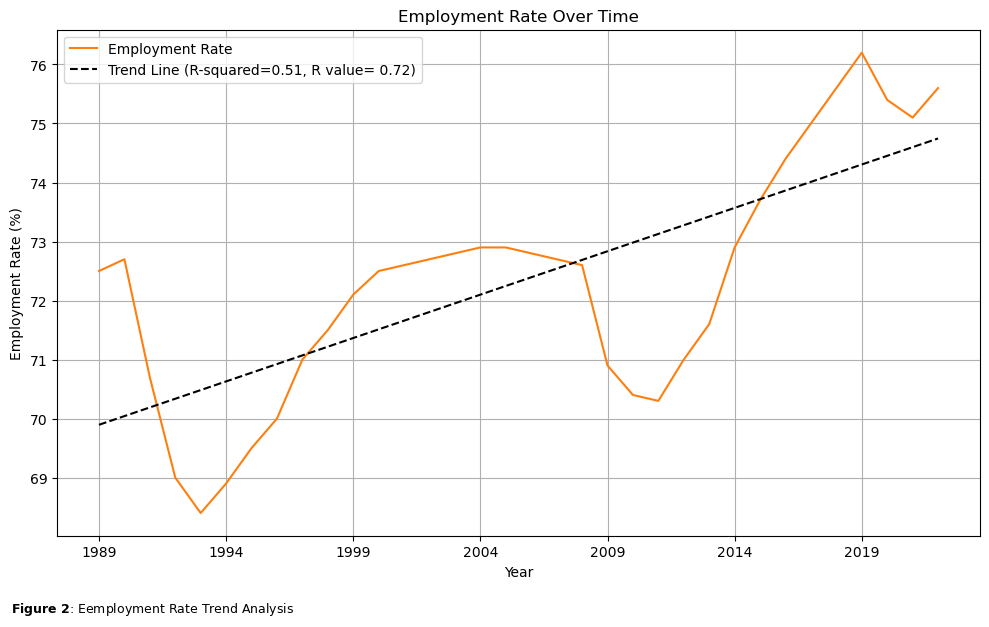

In [5]:

# Create a line graph for the Employment Rate
plt.figure(figsize=(10, 6))
plt.plot(employment_df['Year'], employment_df['Employment Rate'], label='Employment Rate', color='#ff7f0e')

# Calculate the trend line (linear regression)
x = np.arange(len(employment_df))
y = employment_df['Employment Rate']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Equation for trend line
trend_line = slope * x + intercept
print(f'Gradient (Slope) = {slope:.2f}')

# Plot the trend line, displayed in dotted, calculate R(correlation coefficient), and R squared 
plt.plot(employment_df['Year'], trend_line, label=f'Trend Line (R-squared={r_value**2:.2f}, R value={r_value: .2f})'
 , linestyle='--', color='black')
plt.title('Employment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Figure position adjusted as requred  ,transform=plt.gca().transAxes is used 
x_ticks = employment_df['Year'][::5]
plt.xticks(x_ticks)
plt.text(-0.05, -0.15, r'$\bf{Figure\ 2}$: Eemployment Rate Trend Analysis', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()



#### 2.1.3 Inflation Rate
The **Annual Inflation Rate** is the percentage at which prices for goods and services in an economy are increasing over a given year

Figure 3 presents a line graph showing the Inflation Rate over time. The graph reveals a relatively stable trend with a slight negetive slope, shown by the calculated gradient of approximately -0.06. This indicates a gradual decrease in the Inflation Rate over time, sourced from Table 3.

As seen, the R value of approximately -0.31 indicates a moderate negative correlation, emphasizing the direction of the linear trend. The R-squared value of about 0.1 indicates that the linear trend explains only a limited portion of the data's variance. 

In [6]:
# Load the CSV file,skipping the first 7 rows, then read 34 rows as we need to get rid other rows 
inflation_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\inflationrates.csv", skiprows=range(1, 8), nrows=34)

# Rename columns
inflation_df = inflation_df.rename(columns={
    "Title": "Year",
    "CPIH ANNUAL RATE 00: ALL ITEMS 2015=100": "Inflation Rate"
})


inflation_df.head()




,Year,Inflation Rate
0,1989,5.7
1,1990,8.0
2,1991,7.5
3,1992,4.6
4,1993,2.6


######   Table 3: Inflation rates listed by year

Gradient (Slope) = -0.06


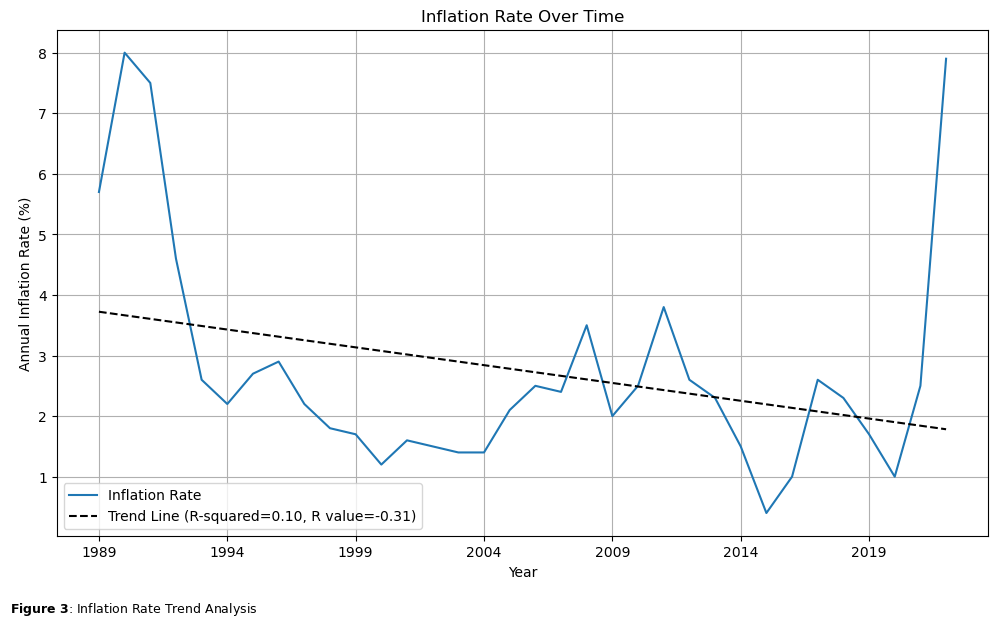

In [7]:

# Create a line graph for the Inflation Rate
plt.figure(figsize=(10, 6))
plt.plot(inflation_df['Year'], inflation_df['Inflation Rate'], label='Inflation Rate', color='#1f77b4')

# Calculate the trend line 
x = np.arange(len(inflation_df))
y = inflation_df['Inflation Rate']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Generate y values for the trend line
trend_line = slope * x + intercept
print(f'Gradient (Slope) = {slope:.2f}')

# Plot the trend line, displayed in dotted, calculate R(correlation coefficient), and R squared 
plt.plot(inflation_df['Year'], trend_line, label=f'Trend Line (R-squared={r_value**2:.2f}, R value={r_value: .2f})'
 , linestyle='--', color='black')
        
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Inflation Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Figure position adjusted as requred  ,transform=plt.gca().transAxes is used
years_with_5_gap = inflation_df['Year'].iloc[::5]
plt.xticks(years_with_5_gap)
plt.text(-0.05, -0.15, r'$\bf{Figure\ 3}$: Inflation Rate Trend Analysis', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()


#### 2.1.4. GDP Growth Rate
The **GDP (Gross Domestic Product) Growth Rate** measures how fast a country's economy is growing over a given period.


The line graph in this plot, as shown in Figure 4, represents the GDP Growth Rate over time. This graph displays a relatively modest trend with a mostly flat negative slope, as indicated by the calculated gradient of approximately -0.002. The R value of around -0.04 indicates a negative correlation. Furthermore, the R-squared value, described as very small, suggests that the linear trend explains only a minimal portion of the data's variance. This trend, as observed in Table 4, suggests almost flat, weak negative impact, on the economic growth.


In [8]:
# This GDP rate is restructured in 3 steps: 
# step 1 Remove the format Year and Quarter to Year only . This results same year appears  4 times
# step 2 Average the Year coulmns , making Quartely rates to annual rate -same year still appers 4 times
# step 3 Remove duplicate rows in Year column
# step 4 reindex as previous index based on including removed rows
#---------------------------------------------------------------------------------------------------------------

# Load csv, skip the first 142 rows and keep 136 rows
gdp_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Gdp.csv", skiprows=range(1, 143), nrows=136)

# Extract  information from the "Title" column which has the format 'Year Quater', extract only year and keep in 'Year' column
# so that 'Year' column contains the same year 4 times (later we'll get the mean value) - step 1
gdp_df['Year'] = gdp_df['Title'].str.extract(r'(\d{4}) Q\d')

# Convert the "Gross Domestic Product" column to numeric, replacing non-numeric values with NaN
gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'] = pd.to_numeric(
    gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'],
    errors='coerce'  
)

# Group by year and calculate the average GDP for every 4 consecutive quarters, we now 4 times the same year with 
# avarage value (annual GDP Graowth Rate) -step 2
gdp_df['GDP Growth Rate'] = gdp_df.groupby('Year')['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'].transform('mean')

# Drop the "Title" and "Gross Domestic Product: Quarter on Quarter growth: CVM SA %" columns: these columns need to get rid of
# as we already coluns 'Year and 'GDP Growth Rate'
gdp_df = gdp_df.drop(columns=['Title', 'Gross Domestic Product: Quarter on Quarter growth: CVM SA %'])

# Drop duplicate rows to keep only one row per year. Now we remove duplicate rows in step 2, Year columns is done - step 3
gdp_df = gdp_df.drop_duplicates(subset='Year', keep='first')

# Reset the index - step 4
gdp_df = gdp_df.reset_index(drop=True)


gdp_df.head()





,Year,GDP Growth Rate
0,1989,0.275
1,1990,-0.075
2,1991,-0.250
3,1992,0.200
4,1993,0.625


######   Table 4: GDP Growth  rates listed by year

Gradient (Slope) = -0.002
R Value is = -0.04


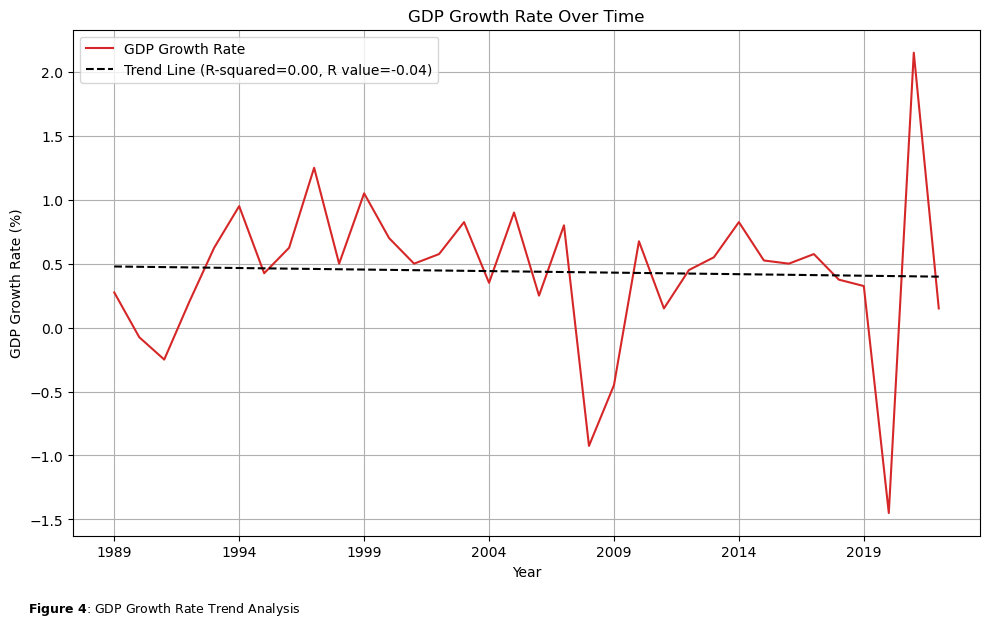

In [9]:

# Create a line graph for the GDP Growth Rate
plt.figure(figsize=(10, 6))
plt.plot(gdp_df['Year'], gdp_df['GDP Growth Rate'], label='GDP Growth Rate', color='#d62728')

# Calculate the trend line 
x = np.arange(len(gdp_df))
y = gdp_df['GDP Growth Rate']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f'Gradient (Slope) = {slope:.3f}')

# Generate y values for the trend line
trend_line = slope * x + intercept

# Trend line
plt.plot(gdp_df['Year'], trend_line, label=f'Trend Line (R-squared={r_value**2:.2f}, R value={r_value: .2f})'
 , linestyle='--', color='black')
plt.title('GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Set x-axis ticks to show every 5 years
x_ticks = gdp_df['Year'][::5]
plt.text(-0.05, -0.15, r'$\bf{Figure\ 4}$: GDP Growth Rate Trend Analysis', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.xticks(x_ticks)

print(f'R Value is = {r_value:.2f}')



#### 2.1.5 Summary of Trends
The previously identified trends of 'increasing' and 'decreasing,' along with their respective R values for each indicator, will be presented in Table 5. These trends will be visually represented in Figure 5 through a bar chart. The analysis indicates that increasing employability (more job security) and decreasing inflation (slow rate goods increasing) and unemployment rates are favorable trends for both the economy and the people in the UK. The only adverse trend is the decrease in GDP growth rate.


To determine whether a trend is favorable or adverse, and to visualize it as a proportion, we need to consider all favorable trends and all adverse trends. When these trends are analyzed with their corresponding R values, their values should be converted to absolute values. It becomes clear that a substantial portion of trends corresponds to favorable trends. This observation will be visually illustrated in Figure 6 through a pie chart.


However, this approach may introduce bias as the absolute values of both the unemployment rate and employment rate represent similar aspects. Therefore, a more improved version is presented in Figure 7, which excludes the employment rate from the favorable trend.

In [10]:
r_values = {
    'Unemployment Rate': -0.64,
    'Inflation Rate': -0.21,
    'Employment Rate': 0.72,
    'GDP Growth': -0.04
}

# Create a DataFrame from the dictionary
trends_df = pd.DataFrame({
    'Indicator': list(r_values.keys()),
    'R value': list(r_values.values())
})

# Add new column 'Trend' based on 'R value' two status increasing/decreasing
trends_df['Trend'] = ['Increasing' if r > 0 else 'Decreasing' for r in trends_df['R value']]

# Display the DataFrame
trends_df


,Indicator,R value,Trend
0,Unemployment Rate,-0.64,Decreasing
1,Inflation Rate,-0.21,Decreasing
2,Employment Rate,0.72,Increasing
3,GDP Growth,-0.04,Decreasing


######   Table 5: Economic Indicators – Trend (Increase/Decrease)

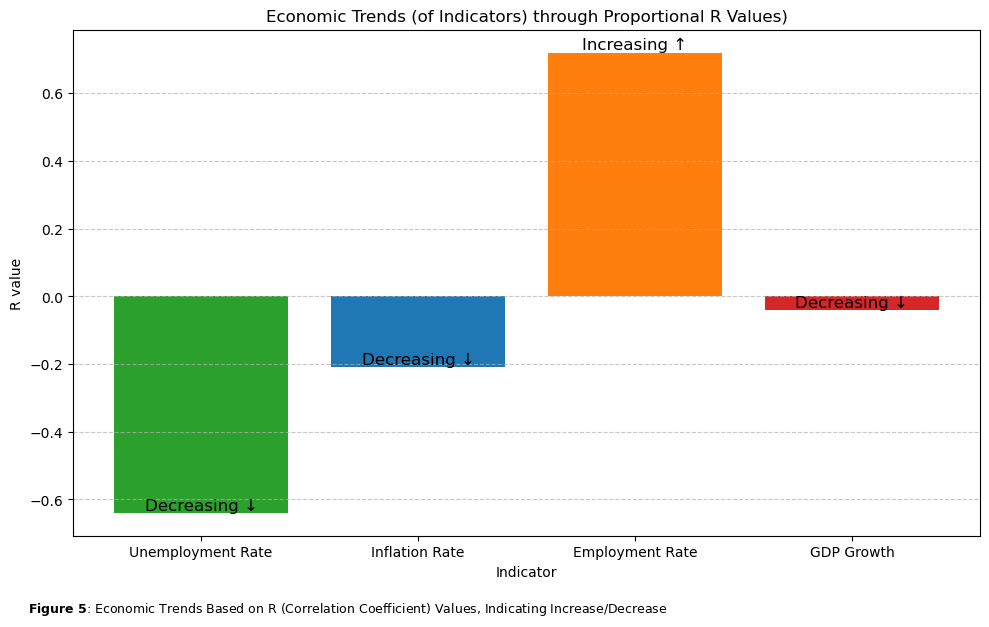

In [11]:
# Here, bar size is determined by R value,  positive and negetive assign a label increasing and decreasing 
# (arrows are copied from onle)
# -----------------------------------------------------------------------------------------------------

# Define different colors for each indicator, used prefered colurs as each indicator was allocated before.
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']

# Create a bar chart with different colors for each indicator, title, label 
plt.figure(figsize=(10, 6))
bars = plt.bar(trends_df['Indicator'], trends_df['R value'], color=colors)
plt.title('Economic Trends (of Indicators) through Proportional R Values)')
plt.xlabel('Indicator')
plt.ylabel('R value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks()
plt.tight_layout()

# Label the bars with "Increasing" or "Decreasing" using zip() function to combine to lists, then iterate 
for bar, r_value in zip(bars, trends_df['R value']):
    label = 'Increasing ↑' if r_value > 0 else 'Decreasing ↓'
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom', fontsize=12)
plt.text(-0.05, -0.15, r'$\bf{Figure\ 5}$: Economic Trends Based on R (Correlation Coefficient) Values, Indicating Increase/Decrease', transform=plt.gca().transAxes, fontsize=9, color='black')

# Show the plot
plt.show()

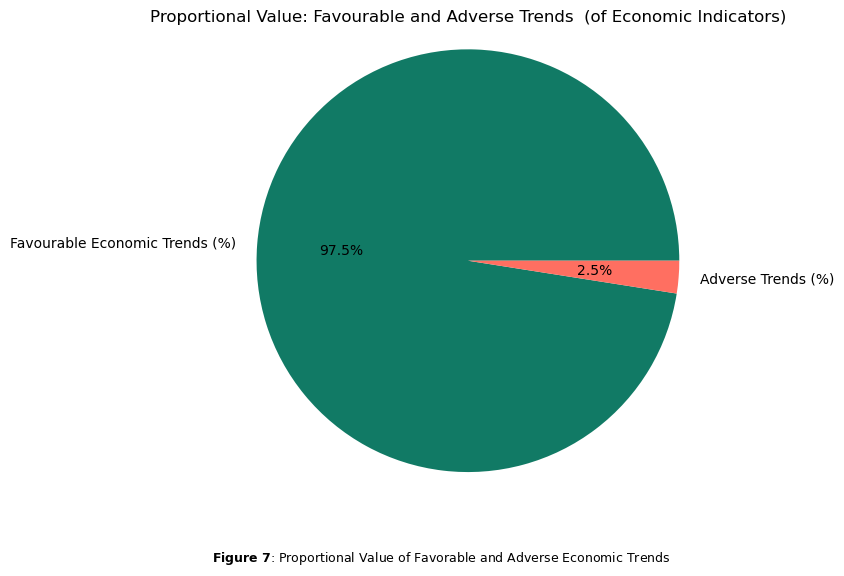

In [12]:
# Here, we are only interested about the absolute values as we will find favourable and adverse trends, based on R value in Table 5 
# (no matter value is positive or negetive)
# step 1: calculate abs of employment rate, unemployment rate and inflation rate which are all favourable in our case, named P
# step 2: calculate abs of GDP Growth Rate which is adverse in our case, named Q
# step 3: Proportional values fitting pie chart
#----------------------------------------------------------------------------------------------------------------
r_values = {
    'Unemployment Rate': -0.64,
    'Inflation Rate': -0.21,
    'Employment Rate': 0.72,
    'GDP Growth': -0.04
}

# Create a DataFrame from the dictionary
trends_df = pd.DataFrame({
    'Indicator': list(r_values.keys()),
    'R value': list(r_values.values())
})

# Calculate the absolute values of R values for all indicators except GDP - step 1
trends_df['Absolute R value'] = trends_df.apply(lambda row: abs(row['R value']) if row['Indicator'] != 'GDP Growth' else row['R value'], axis=1)

# Calculate the absolute R value for employment rate, unemployment rate, and inflation rate combined (P)
P = trends_df.loc[trends_df['Indicator'].isin(['Unemployment Rate', 'Inflation Rate', 'Employment Rate']), 'Absolute R value'].sum()

# Calculate the absolute R value for GDP (Q) -step 2
Q = trends_df.loc[trends_df['Indicator'] == 'GDP Growth', 'Absolute R value'].values[0]

# step 3
# Create labels for the pie chart
labels = ['Favourable Economic Trends (%)', 'Adverse Trends (%)']

# Create data for the pie chart. (I have already made Q as absolute value but kept error coming, so make it 
# work using abs(Q))
sizes = [P, abs(Q)]

# Define colours for the pie chart (Blue-Green and Red-Orange mix)
colors = ['#117a65', '#ff6f61']  

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)

# Title for the pie chart
plt.title('Proportional Value: Favourable and Adverse Trends  (of Economic Indicators)')

# Show the pie chart
plt.axis('equal')  
plt.text(-0.05, -0.15, r'$\bf{Figure\ 7}$: Proportional Value of Favorable and Adverse Economic Trends', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()


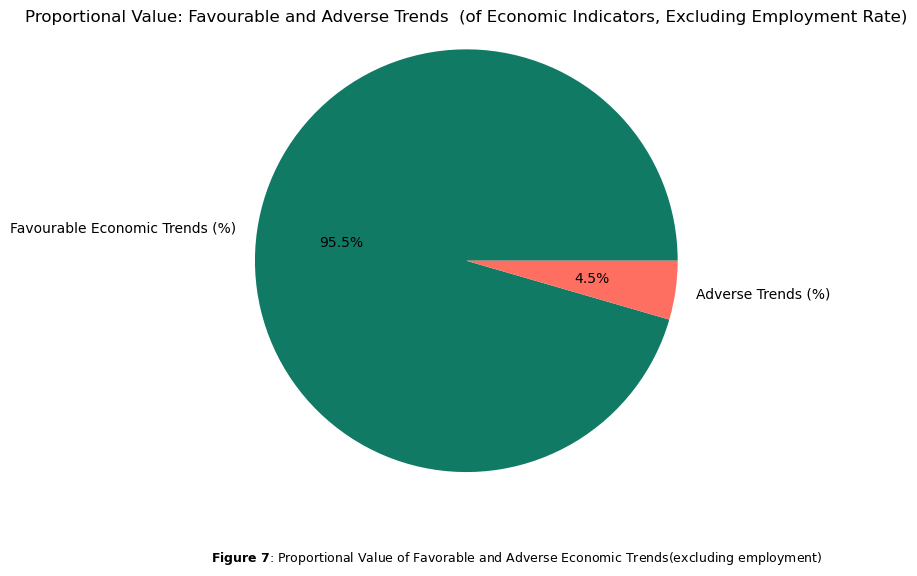

In [13]:
# Here, all the steps are the same exept removing employment rate. Using this would be biased as 
# abs of both value unemployment and represent the similar thing.

r_values = {
    'Unemployment Rate': -0.64,
    'Inflation Rate': -0.21,
    'Employment Rate': 0.72,
    'GDP Growth': -0.04
}

# Create a DataFrame from the dictionary
trends_df = pd.DataFrame({
    'Indicator': list(r_values.keys()),
    'R value': list(r_values.values())
})

# Calculate the absolute values of R values for all indicators except Employment Rate and GDP Growth
trends_df['Absolute R value'] = trends_df.apply(lambda row: abs(row['R value']) if row['Indicator'] not in ['Employment Rate', 'GDP Growth'] else row['R value'], axis=1)

# Calculate the absolute R value for Unemployment Rate, Inflation Rate, and GDP Growth combined (P)
P = trends_df.loc[trends_df['Indicator'].isin(['Unemployment Rate', 'Inflation Rate']), 'Absolute R value'].sum()

# Calculate the absolute R value for GDP (Q)
Q = trends_df.loc[trends_df['Indicator'] == 'GDP Growth', 'Absolute R value'].values[0]

# Create labels for the pie chart
labels = ['Favourable Economic Trends (%)', 'Adverse Trends (%)']

# Create data for the pie chart
sizes = [P, abs(Q)]

# Define colors for the pie chart (Blue-Green and Red-Orange mix)
colors = ['#117a65', '#ff6f61']  
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)

# Title for the pie chart
plt.title('Proportional Value: Favourable and Adverse Trends  (of Economic Indicators, Excluding Employment Rate)')

# Show the pie chart
plt.axis('equal') 
plt.text(-0.05, -0.15, r'$\bf{Figure\ 7}$: Proportional Value of Favorable and Adverse Economic Trends(excluding employment)', transform=plt.gca().transAxes, fontsize=9, color='black')

plt.show()


#### 2.1.6 Conclusion on trends of economic indicators
Looking at the big picture, these four key economic indicators—unemployment rate, employment rate, inflation rate, and GDP rate—exhibit a positive overall trend, even though their values may fluctuate from year to year. In the broader perspective, these  trends have been consistently favorable for the economic well-being of the United Kingdom.

### 2.2  Are There Interconnections Between the Indicators?
As seen in 2.1 section, all economic indicates individually have a general trend over the years. This section will look at the inter-relations between each indicators.

**Mathodeology** 
1. Create a combined dataframe with columns of 'Year' and each economic indicator.(see Table 6)
2. Plot line graphs of all indicators in one, and identify if there is any relationship.(see Figure 8)
3. Compare the relationships pairwise in the line graphs.(see Figure 9-12)
4. Create a heatmap and find correlations and compare with what was observed in (3). (see Figure 14)
5. Find summary statistics and histogram patterns for further analysis (This is not essential to answer the research question but would be needed for more advanced analysis).(see Table 7)



#### 2.2 .1 General Pattern

The plot in Figure 8 presents the relationships between four economic indicators (Inflation Rate, Employment Rate, Unemployment Rate, and GDP Growth Rate) over time, using data sourced from Table 6. However, it's important to note that clear relationships between these indicators are not visible in this visualization.

Further analysis, such as correlation calculations or pairwise comparisons of indicators, may be necessary to explore potential interconnections more comprehensively

In [55]:
# The CSV files load again as previously loaded, combined all in one Pandas DataFrame, duplicate the 'Year' columns.
#---------------------------------------------------------------------------------------------------------------

# Load the CSV file for inflation rates, skip rows, and rename columns
inflation_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\inflationrates.csv", skiprows=range(1, 8), nrows=34)
inflation_df = inflation_df.rename(columns={
    "Title": "Year",
    "CPIH ANNUAL RATE 00: ALL ITEMS 2015=100": "Annual Inflation Rate"
})

# Load the CSV file for employment rates, skip rows, and rename columns
employment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Employement rates.csv", skiprows=range(1, 26), nrows=34)
employment_df = employment_df.rename(columns={
    "Title": "Year",
    "Employment rate (aged 16 to 64, seasonally adjusted): %": "Employment Rate"
})

# Load the CSV file for unemployment rates, skip rows, and rename columns
unemployment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Unemployementrates.csv", skiprows=range(1, 26), nrows=34)
unemployment_df = unemployment_df.rename(columns={
    "Title": "Year",
    "Unemployment rate (aged 16 and over, seasonally adjusted): %": "Unemployment Rate"
})


# Load the CSV file created in Part 1 into a Pandas DataFrame
gdp_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Gdp.csv", skiprows=range(1, 143), nrows=136)

# Extract the year and quarter information from the "Title" column
gdp_df['Year'] = gdp_df['Title'].str.extract(r'(\d{4}) Q\d')

# Convert the "Gross Domestic Product" column to numeric, replacing non-numeric values with NaN
gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'] = pd.to_numeric(
    gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'],
    errors='coerce'  # Convert non-numeric values to NaN
)

# Group by year and calculate the average GDP for every 4 consecutive quarters
gdp_df['GDP Growth Rate'] = gdp_df.groupby('Year')['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'].transform('mean')

# Drop the "Title" and "Gross Domestic Product: Quarter on Quarter growth: CVM SA %" columns
gdp_df = gdp_df.drop(columns=['Title', 'Gross Domestic Product: Quarter on Quarter growth: CVM SA %'])

# Drop duplicate rows to keep only one row per year
gdp_df = gdp_df.drop_duplicates(subset='Year', keep='first')

# Reset the index
gdp_df = gdp_df.reset_index(drop=True)



# Select only the desired columns excluding "Year"
inflation_df = inflation_df[['Year', 'Annual Inflation Rate']]
employment_df = employment_df[['Employment Rate']]
unemployment_df = unemployment_df[['Unemployment Rate']]
gdp_df = gdp_df[['GDP Growth Rate']]
combined_df = pd.concat([inflation_df, employment_df, unemployment_df, gdp_df], axis=1)




# Combined DataFrame
combined_df.head()



,Year,Annual Inflation Rate,Employment Rate,Unemployment Rate,GDP Growth Rate
0,1989,5.7,72.5,7.2,0.275
1,1990,8.0,72.7,7.1,-0.075
2,1991,7.5,70.7,8.9,-0.250
3,1992,4.6,69.0,9.9,0.200
4,1993,2.6,68.4,10.4,0.625


##### Table 6: Economic Indicators Summary Listed by Year

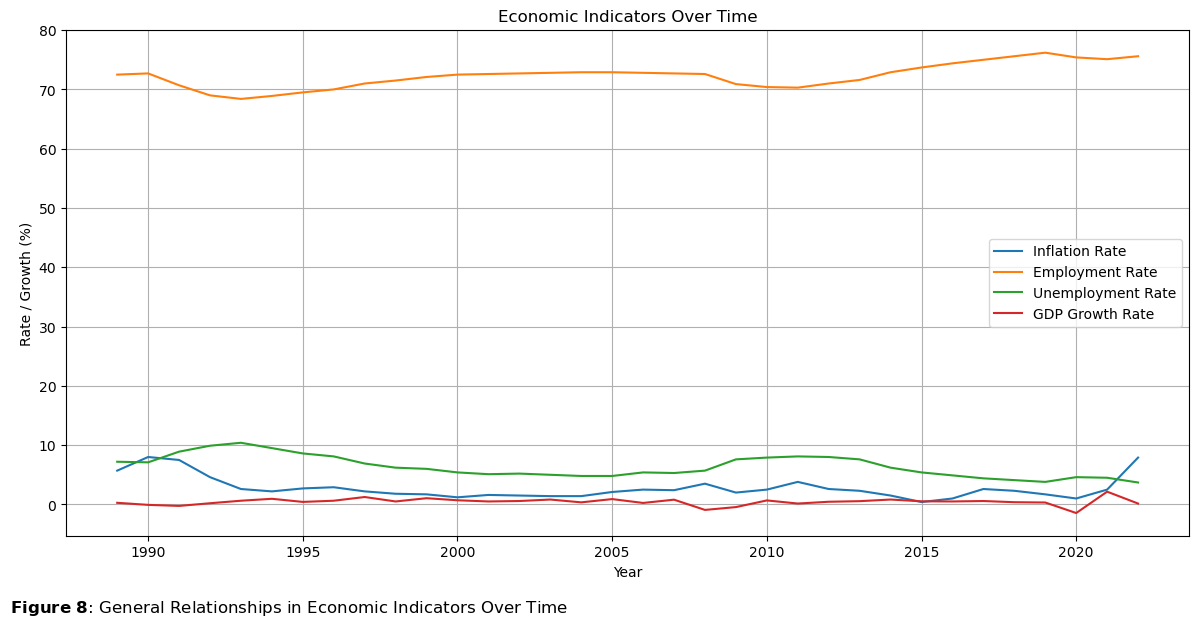

In [56]:

# Define the colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Inflation Rate
ax.plot(combined_df['Year'], combined_df['Annual Inflation Rate'], label='Inflation Rate', color=colors[0])

# Plot the Employment Rate
ax.plot(combined_df['Year'], combined_df['Employment Rate'], label='Employment Rate', color=colors[1])

# Plot the Unemployment Rate
ax.plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color=colors[2])

# Plot the GDP Growth
ax.plot(combined_df['Year'], combined_df['GDP Growth Rate'], label='GDP Growth Rate', color=colors[3])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate / Growth (%)')
ax.set_title('Economic Indicators Over Time')

# Add a legend
ax.legend()

# Show the plot
ax.grid(True)
plt.tight_layout()
plt.text(-0.05, -0.15, r'$\bf{Figure\ 8}$: General Relationships in Economic Indicators Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()


#### 2.2.2  Relationship between inflation rate and unemployment rate

The plot in Figure 9 illustrates a direct relationship between the Inflation Rate and Unemployment Rate over time. This means that when one increases, the other also tends to increase, and when one decreases, the other tends to decrease. The data indicates that these two indicators move in the same direction over time, suggesting a positive correlation between them.

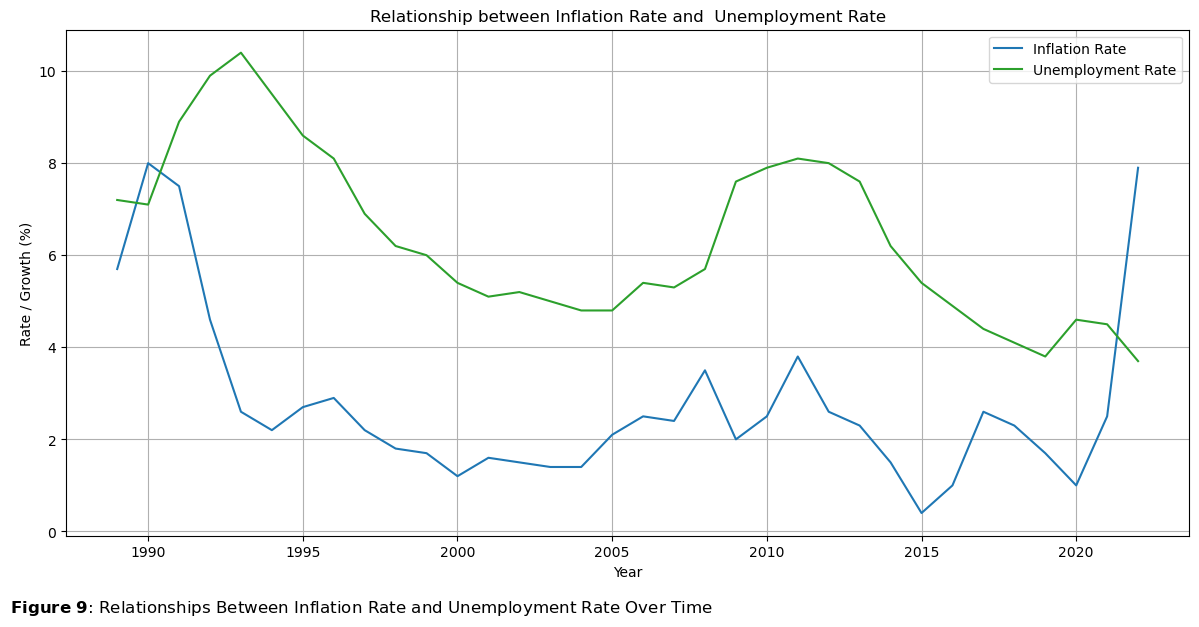

In [57]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Inflation Rate
ax.plot(combined_df['Year'], combined_df['Annual Inflation Rate'], label='Inflation Rate', color='#1f77b4')


# Plot the Unemployment Rate
ax.plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')


# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate / Growth (%)')
ax.set_title('Relationship between Inflation Rate and  Unemployment Rate')

# Add a legend
ax.legend()

# Show the plot
ax.grid(True)
plt.tight_layout()
plt.text(-0.05, -0.15, r'$\bf{Figure\ 9}$: Relationships Between Inflation Rate and Unemployment Rate Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()


#### 2.2.3  Relationship between inflation rate and GDP growth rate

The plot in Figure 10 shows the relationship between the Inflation Rate and GDP Growth Rate over time. It suggests an inverse relationship, wherein an increase in Inflation Rate tends to coincide with a decrease in GDP Growth Rate and vice versa. The graph also reveals periodic fluctuations in both indicators, highlighting the dynamic nature of economic cycles. For a more precise assessment of this relationship, quantitative analysis, such as correlation calculations, is required 

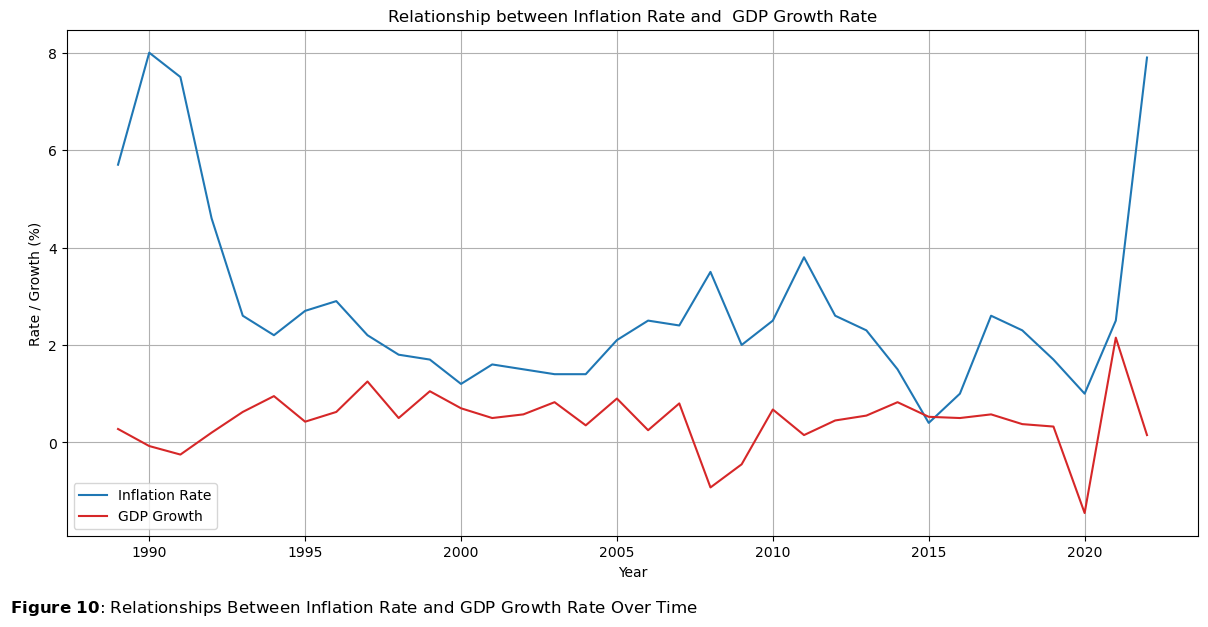

In [58]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Inflation Rate
ax.plot(combined_df['Year'], combined_df['Annual Inflation Rate'], label='Inflation Rate', color='#1f77b4')


# Plot the GDP Growth
ax.plot(combined_df['Year'], combined_df['GDP Growth Rate'], label='GDP Growth', color='#d62728')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate / Growth (%)')
ax.set_title('Relationship between Inflation Rate and  GDP Growth Rate')

# Add a legend
ax.legend()

# Show the plot
ax.grid(True)
plt.tight_layout()
plt.text(-0.05, -0.15, r'$\bf{Figure\ 10}$: Relationships Between Inflation Rate and GDP Growth Rate Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()


#### 2.2.4  Relationship between GDP growthn rate and unemployment rate

Figure 11 highlights a weak inverse relationship between GDP Growth Rate and Unemployment Rate, emphasizing the weak connection between economic growth and employment. 

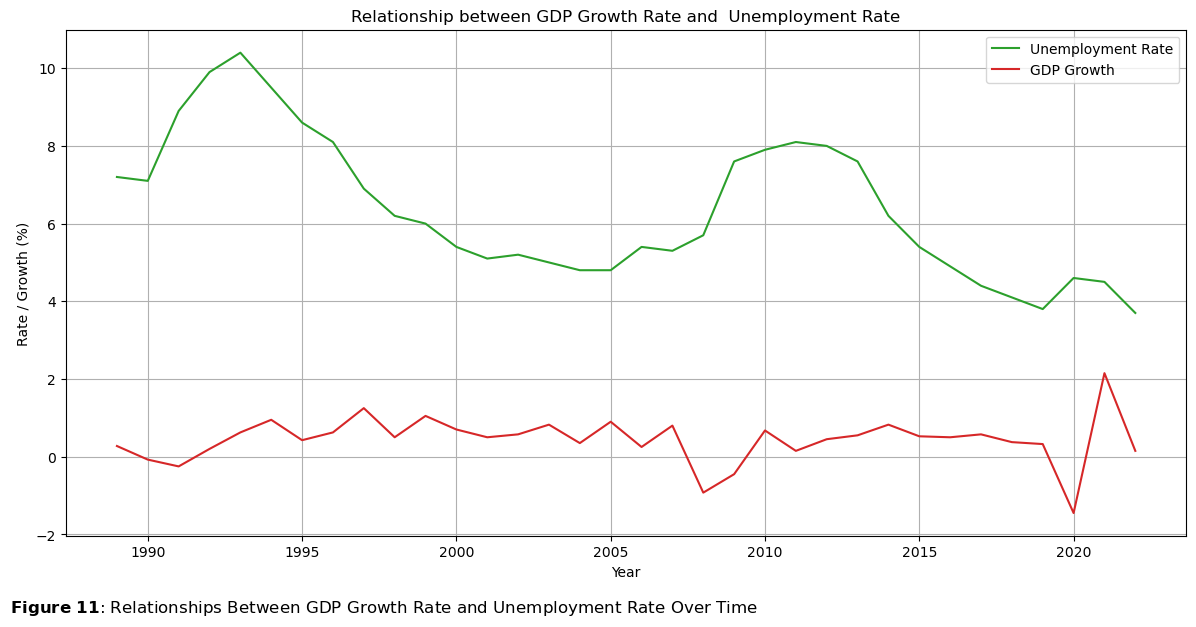

In [59]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the Unemployment Rate
ax.plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')

# Plot the GDP Growth
ax.plot(combined_df['Year'], combined_df['GDP Growth Rate'], label='GDP Growth', color='#d62728')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate / Growth (%)')
ax.set_title('Relationship between GDP Growth Rate and  Unemployment Rate')

# Add a legend
ax.legend()

# Show the plot
ax.grid(True)
plt.tight_layout()
plt.text(-0.05, -0.15, r'$\bf{Figure\ 11}$: Relationships Between GDP Growth Rate and Unemployment Rate Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()



#### 2.2.5  Relationship between employment rate and unemployment rate
Figure 12 highlights an intuitive clear relationship between the Employment Rate and Unemployment Rate, emphasizing the strong connection between job creation and unemployment reduction, which is absolutely obvious as both look at the similar aspects.

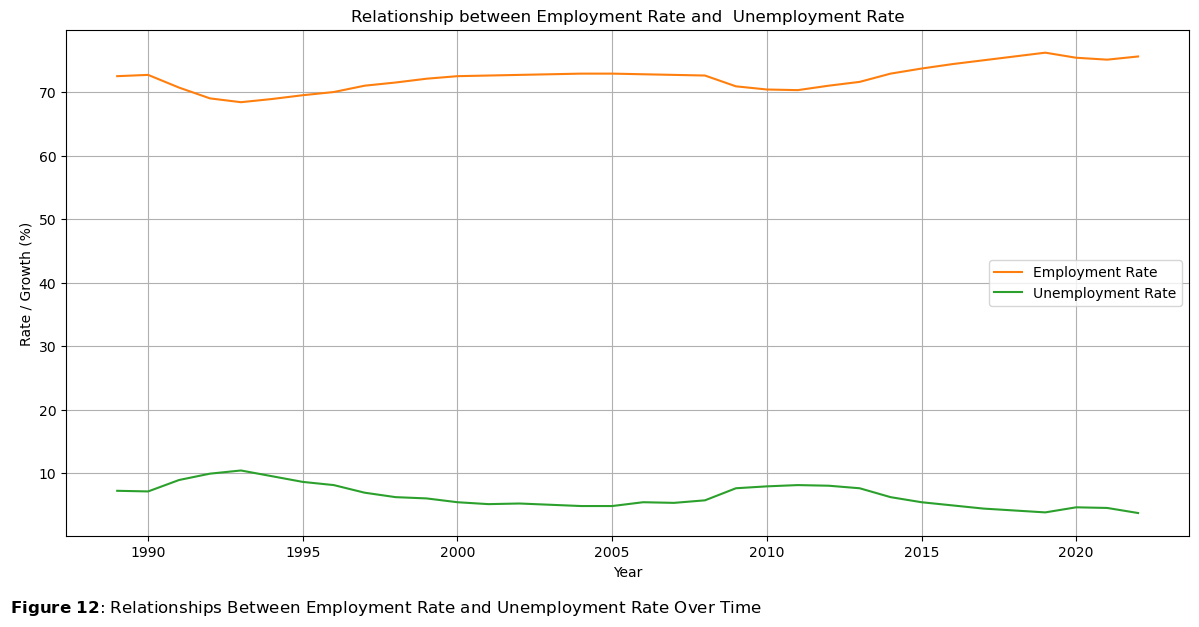

In [60]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the Employment Rate
ax.plot(combined_df['Year'], combined_df['Employment Rate'], label='Employment Rate', color='#ff7f0e')

# Plot the Unemployment Rate
ax.plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color= '#2ca02c')


# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate / Growth (%)')
ax.set_title('Relationship between Employment Rate and  Unemployment Rate')

# Add a legend
ax.legend()

# Show the plot
ax.grid(True)
plt.tight_layout()
plt.text(-0.05, -0.15, r'$\bf{Figure\ 12}$: Relationships Between Employment Rate and Unemployment Rate Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()


#### 2.2.6  Summary of Relationship between economic indicators

The consolidated view in Figure 13, displaying all the relationships between economic indicators in a single figure, provides a convenient way to compare and assess the relationships observed in the past. This visual summary simplifies the process of analyzing how these key economic factors interact over time.

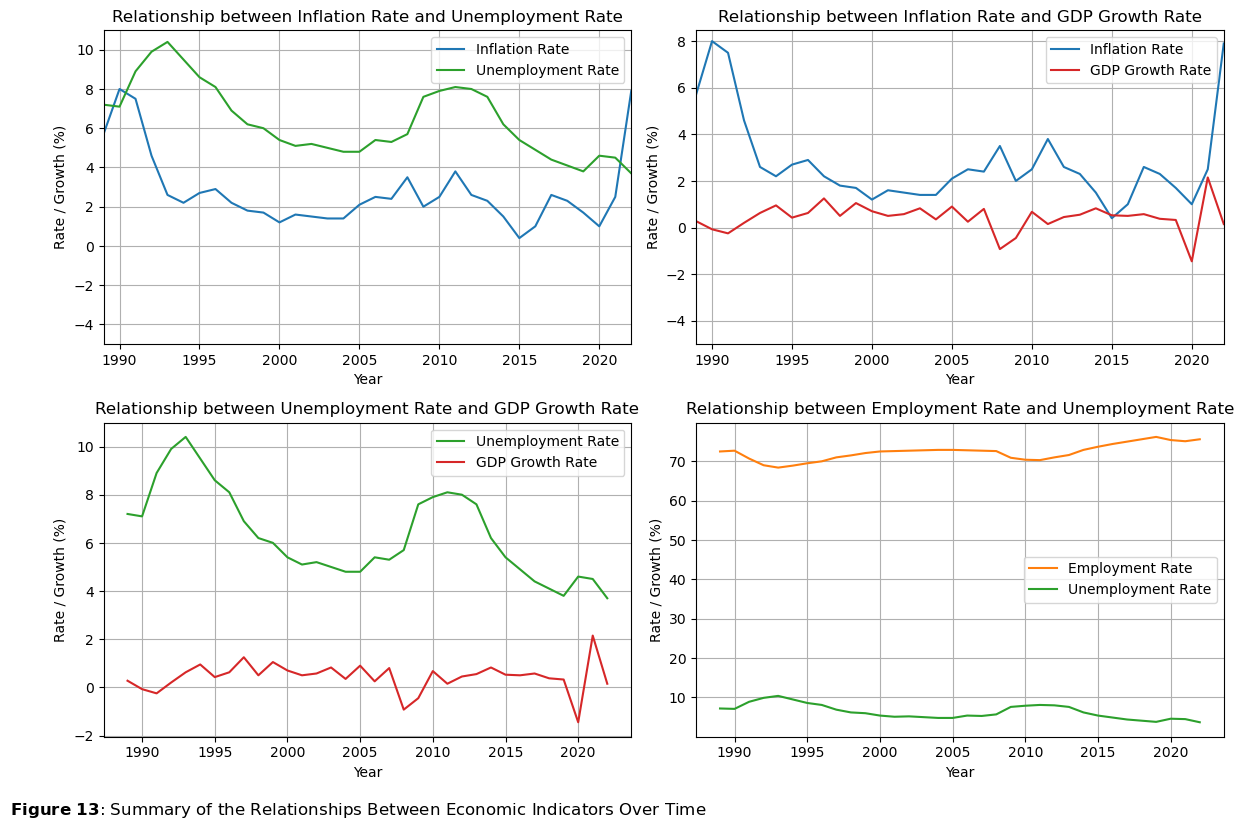

In [61]:
# All figure 8 -11 displays in a single figure
#---------------------------------------------------------------------------------------------------------------

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Inflation Rate vs. Unemployment Rate
axs[0, 0].plot(combined_df['Year'], combined_df['Annual Inflation Rate'], label='Inflation Rate', color='#1f77b4')
axs[0, 0].plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Rate / Growth (%)')
axs[0, 0].set_title('Relationship between Inflation Rate and Unemployment Rate')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_ylim(bottom=-5, top=11) 

# Set x-axis limits based on data range
axs[0, 0].set_xlim(min(combined_df['Year']), max(combined_df['Year']))

# Plot 2: Inflation Rate vs. GDP Growth
axs[0, 1].plot(combined_df['Year'], combined_df['Annual Inflation Rate'], label='Inflation Rate', color='#1f77b4')
axs[0, 1].plot(combined_df['Year'], combined_df['GDP Growth Rate'], label='GDP Growth Rate', color='#d62728')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Rate / Growth (%)')
axs[0, 1].set_title('Relationship between Inflation Rate and GDP Growth Rate')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_ylim(bottom=-5)  

# Set x-axis limits based on data range
axs[0, 1].set_xlim(min(combined_df['Year']), max(combined_df['Year']))

#  Unemployment Rate vs. GDP Growth
axs[1, 0].plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')
axs[1, 0].plot(combined_df['Year'], combined_df['GDP Growth Rate'], label='GDP Growth Rate', color='#d62728')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Rate / Growth (%)')
axs[1, 0].set_title('Relationship between Unemployment Rate and GDP Growth Rate')
axs[1, 0].legend()
axs[1, 0].grid(True)

#  Employment Rate vs. Unemployment Rate
axs[1, 1].plot(combined_df['Year'], combined_df['Employment Rate'], label='Employment Rate', color='#ff7f0e')
axs[1, 1].plot(combined_df['Year'], combined_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Rate / Growth (%)')
axs[1, 1].set_title('Relationship between Employment Rate and Unemployment Rate')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.text(-1.3, -0.25, r'$\bf{Figure\ 13}$: Summary of the Relationships Between Economic Indicators Over Time', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()


#### 2.2.7  Correlations in Economic Statistics

In the previous section (2.2.6), relationships were observed graphically. However, for better numerical comparisons, ranging from -1 to 1, a correlation analysis would be helpful, which this section will perform.

In Figure 14, the heatmap provides a clear picture of how our economic indicators relate. Think of the colors as signs - warm colors show positive relationships, while cool colors reveal negative ones.

Inflation vs. Employment: They are like opposites - when inflation  goes down (deep blue), employment goes up. It is a common rule in economics that lower inflation often means more jobs.

Inflation vs. Unemployment:  When inflation is higher (lighter blue), unemployment  tends to rise a bit too. 

Unemployment vs. GDP Growth: When unemployment rates are high (light red), economic growth, or how well the economy is doing, tends to be on the low side. It is like saying that when fewer people have jobs, the economy isn't as strong.

Therefore, this colorful heatmap helps to understand how these economic indicators are connected. It says  that lower inflation often means more jobs, but too much inflation might lead to higher unemployment.



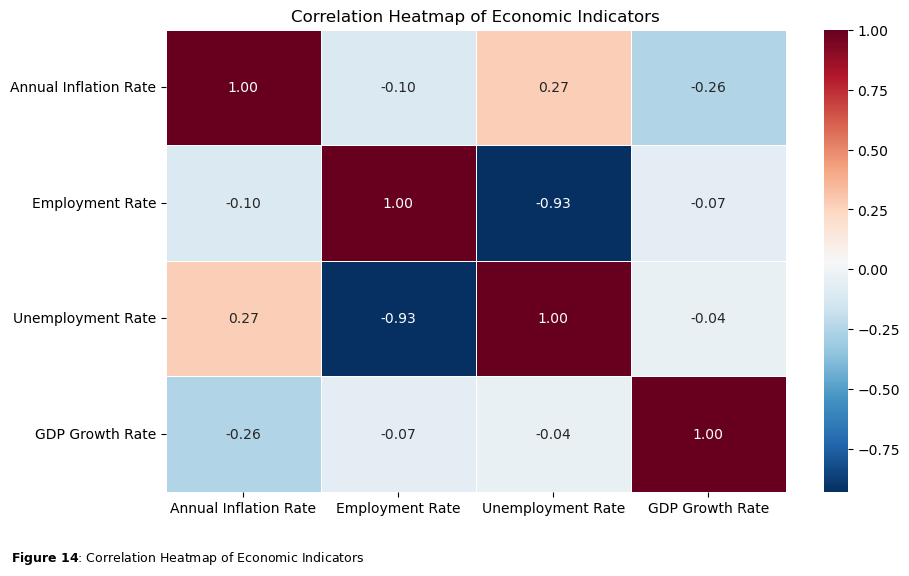

In [30]:

# Select the columns for correlation analysis
correlation_data = combined_df[['Annual Inflation Rate', 'Employment Rate', 'Unemployment Rate', 'GDP Growth Rate']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Economic Indicators")
plt.text(-0.25, -0.15, r'$\bf{Figure\ 14}$: Correlation Heatmap of Economic Indicators', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()

#### 2.2.8 Further relationships: Summary statistics

The summary statistics presented in the table 7 offer a comprehensive understanding of the individual behavior of each economic indicator. They provide essential insights into the central tendencies, variability, and distribution of data for inflation rate, unemployment rate, employment rate, and GDP growth rate. These statistics, including the mean, median, minimum, maximum, range, interquartile range (IQR), coefficient of variation, and skewness, describe about each indicator's historical performance.


It is important to highlight that these statistics mainly tell about each economic indicator by itself. They do not directly show how these indicators are connected to each other. However, it might be helpful for more advanced analyses, even though those analyses could go beyond the current research question. With advanced methods, these statistics can be used to uncover complex relationships and connections between economic indicators, helping understand how they affect each other and have broader impacts.

In [62]:
# Summary statistics for further analysis (I have not done in details as it is outside the scope of my research question)
#------------------------------------------------------------------------------------------------------------------

# Calculate additional metrics for inflation rate
mean_inflation = round(combined_df['Annual Inflation Rate'].mean(), 2)
median_inflation = round(combined_df['Annual Inflation Rate'].median(), 2)
min_inflation = round(combined_df['Annual Inflation Rate'].min(), 2)
max_inflation = round(combined_df['Annual Inflation Rate'].max(), 2)
range_inflation = round(max_inflation - min_inflation, 2)
iqr_inflation = round(combined_df['Annual Inflation Rate'].quantile(0.75) - combined_df['Annual Inflation Rate'].quantile(0.25), 2)
std_inflation = round(combined_df['Annual Inflation Rate'].std(), 2)
cv_inflation = round((std_inflation / mean_inflation) * 100, 2)
skewness_inflation = round(combined_df['Annual Inflation Rate'].skew(), 2)

# Calculate additional metrics for unemployment rate
mean_unemployment = round(combined_df['Unemployment Rate'].mean(), 2)
median_unemployment = round(combined_df['Unemployment Rate'].median(), 2)
min_unemployment = round(combined_df['Unemployment Rate'].min(), 2)
max_unemployment = round(combined_df['Unemployment Rate'].max(), 2)
range_unemployment = round(max_unemployment - min_unemployment, 2)
iqr_unemployment = round(combined_df['Unemployment Rate'].quantile(0.75) - combined_df['Unemployment Rate'].quantile(0.25), 2)
std_unemployment = round(combined_df['Unemployment Rate'].std(), 2)
cv_unemployment = round((std_unemployment / mean_unemployment) * 100, 2)
skewness_unemployment = round(combined_df['Unemployment Rate'].skew(), 2)

# Calculate additional metrics for employment rate
mean_employment = round(combined_df['Employment Rate'].mean(), 2)
median_employment = round(combined_df['Employment Rate'].median(), 2)
min_employment = round(combined_df['Employment Rate'].min(), 2)
max_employment = round(combined_df['Employment Rate'].max(), 2)
range_employment = round(max_employment - min_employment, 2)
iqr_employment = round(combined_df['Employment Rate'].quantile(0.75) - combined_df['Employment Rate'].quantile(0.25), 2)
std_employment = round(combined_df['Employment Rate'].std(), 2)
cv_employment = round((std_employment / mean_employment) * 100, 2)
skewness_employment = round(combined_df['Employment Rate'].skew(), 2)

# Calculate additional metrics for GDP
mean_gdp = round(combined_df['GDP Growth Rate'].mean(), 2)
median_gdp = round(combined_df['GDP Growth Rate'].median(), 2)
min_gdp = round(combined_df['GDP Growth Rate'].min(), 2)
max_gdp = round(combined_df['GDP Growth Rate'].max(), 2)
range_gdp = round(max_gdp - min_gdp, 2)
iqr_gdp = round(combined_df['GDP Growth Rate'].quantile(0.75) - combined_df['GDP Growth Rate'].quantile(0.25), 2)
std_gdp = round(combined_df['GDP Growth Rate'].std(), 2)
cv_gdp = round((std_gdp / mean_gdp) * 100, 2)
skewness_gdp = round(combined_df['GDP Growth Rate'].skew(), 2)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Indicator': ['Inflation Rate', 'Unemployment Rate', 'Employment Rate', 'GDP Growth Rate'],
    'Mean': [mean_inflation, mean_unemployment, mean_employment, mean_gdp],
    'Median': [median_inflation, median_unemployment, median_employment, median_gdp],
    'Min': [min_inflation, min_unemployment, min_employment, min_gdp],
    'Max': [max_inflation, max_unemployment, max_employment, max_gdp],
    'Range': [range_inflation, range_unemployment, range_employment, range_gdp],
    'IQR': [iqr_inflation, iqr_unemployment, iqr_employment, iqr_gdp],
    'Coefficient of Variation (%)': [cv_inflation, cv_unemployment, cv_employment, cv_gdp],
    'Skewness': [skewness_inflation, skewness_unemployment, skewness_employment, skewness_gdp]
})

# DataFrame
metrics_df

,Indicator,Mean,Median,Min,Max,Range,IQR,Coefficient of Variation (%),Skewness
0,Inflation Rate,2.75,2.30,0.40,8.00,7.6,1.05,68.73,1.80
1,Unemployment Rate,6.36,5.85,3.70,10.40,6.7,2.90,28.93,0.54
2,Employment Rate,72.32,72.60,68.40,76.20,7.8,1.97,2.82,0.04
3,GDP Growth Rate,0.44,0.50,-1.45,2.15,3.6,0.44,138.64,-0.60


##### Table 7: Summary of Economic Indicator Metrics

#### 2.2.9 Conclusion on trends of economic indicators

The visual representations and correlation coefficients reveal several meaningful relationships between economic indicators. These relationships include the direct correlation between Inflation Rate and Unemployment Rate, the inverse relationship between Inflation Rate and GDP Growth Rate, and  between Unemployment Rate and GDP Growth Rate.

### 2.3 What do economic indicators reveal about the quality of life for people in the UK?
In this section, the objective is to assess the influence of economic indicators on the quality of life in the UK. It seeks to determine periods of economic recession and stability, as well as the corresponding implications for individuals. Furthermore, it aims to align these estimations with actual recession times (technical recessions) to validate the findings against historical data. 

**Assumption**:  It is assumed that all negative GDP growth rates correspond to recession periods, while no positive growth rates indicate such periods

##### **Methodeology**


Estimation of Recession Periods:

1. Create a dataframe that contains either 'Recession' or 'Normal,' based on whether the GDP growth rate is positive or negative, along with additional columns for 'Year' and 'GDP Growth Rate (See Table 8).
2. Create a bar chart from the dataframe data, using orange for recession periods and dark green for normal economic periods to effectively distinguish between them (See Figure 15).
3. Identify the recession periods.
4. Identify the waves of unemployment rates and their peak rates that correspond to recession periods (See Figure 16).
5. Identify the time periods that correspond to inflation rise, which would indicate recession periods (See Figure 17).
6. From (5) and (6), identify the common periods during which both rates rise, jointly corresponding to recession periods (See Figure 18).
7. Summarize the findings of the estimation of recession times based on (4) and (6) (See Table 9).
8. Visualize the findings in (7) and make conclusions about the estimation of recession times.(see Figure 19)


Estimation of Economically Stable Periods:


9. Estimate the most stable time in the economy by observing Figures 20 and 21.

Conclusion on the impact of economy on people's living status


10. Conclusions on (8) and (9)



#### 2.3.1 Estimation of past recession time from GDP growth rate


In Figure 15, an analysis of the UK's GDP growth rates over the years is presented, categorizing them into two distinct periods: "Recession Time" and "Normal Time." The GDP growth rates that fall below zero are marked as "Recession Time," highlighted in orange, while the positive growth rates are considered "Normal Time," represented in dark green. 


During recessionary periods, the GDP growth rate remains negative, indicating economic challenges that may include reduced job opportunities, lower consumer spending, and overall economic uncertainty.

In [63]:


combined_df['Recession'] = np.where(combined_df['GDP Growth Rate'] < 0, 'Recession', 'Normal')

# Move the "Year" column to the first position
combined_df = combined_df[['Year'] + [col for col in combined_df.columns if col != 'Year' 
and col != 'Annual Inflation Rate' and col != 'Unemployment Rate' and col != 'Employment Rate']]
# Set display options to align column headings
pd.set_option('display.colheader_justify', 'center')

# Display the DataFrame
combined_df.head()


,Year,GDP Growth Rate,Recession
0,1989,0.275,Normal
1,1990,-0.075,Recession
2,1991,-0.250,Recession
3,1992,0.200,Normal
4,1993,0.625,Normal


##### Table 8: GDP Growth Rates with Recession Indicator

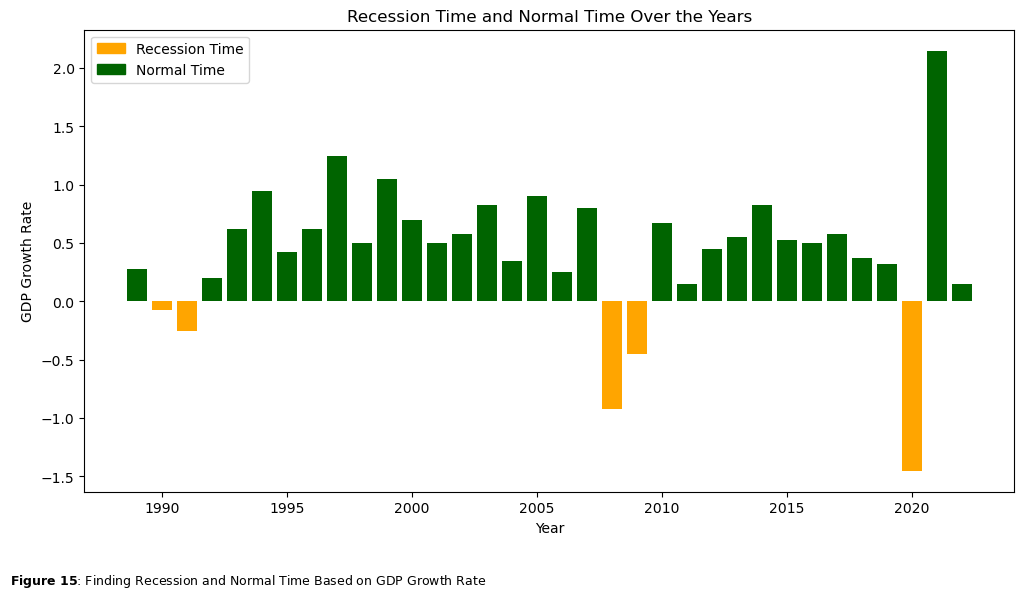

In [64]:


# Adding new column and giving onditions for recessions
combined_df['Recession'] = np.where(combined_df['GDP Growth Rate'] < 0, 'Recession', 'Normal')

# Define colours
dark_green = '#006400'  # Dark Green
orange = '#FFA500'     # Orange

colors = np.where(combined_df['Recession'] == 'Recession', orange, dark_green)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(combined_df['Year'], combined_df['GDP Growth Rate'], color=colors)

# Add labels and title
plt.title('Recession Time and Normal Time Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')

# Customize the colour legend
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color=orange, label='Recession Time'),
    plt.Rectangle((0, 0), 1, 1, color=dark_green, label='Normal Time')],
    loc='upper left'
)

plt.xticks()
plt.text(-0.08, -0.2, r'$\bf{Figure\ 15}$: Finding Recession and Normal Time Based on GDP Growth Rate', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()


#### 2.3.2 Estimating the past recession time from unemployment rate

In Figure 16, a line graph shows the fluctuations in the UK's unemployment rate over time, focusing on peak unemployment years, specifically 1993, 2011, and 2020, marked in maroon. These peak years signify periods of economic stress and challenges, likely impacting the living status of the UK population. During such times, higher unemployment rates are indicative of potential job scarcity and financial insecurity for individuals and families.

In [8]:
# Exactly same csv file as previously loaded are here. ( As 'Year' columns were dropped in the last loaded csv files) 
#------------------------------------------------------------------------------------------------------------------

unemployment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Unemployementrates.csv", skiprows=range(1, 26), nrows=34)
# Rename columns
unemployment_df = unemployment_df.rename(columns={
    "Title": "Year",
    "Unemployment rate (aged 16 and over, seasonally adjusted): %": "Unemployment Rate"
})




# Load the CSV file created 
employment_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Employement rates.csv", skiprows=range(1, 26), nrows=34)

# Rename columns
employment_df = employment_df.rename(columns={
    "Title": "Year",
    "Employment rate (aged 16 to 64, seasonally adjusted): %": "Employment Rate"
})



# Load the CSV file created 
inflation_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\inflationrates.csv", skiprows=range(1, 8), nrows=34)

# Rename columns
inflation_df = inflation_df.rename(columns={
    "Title": "Year",
    "CPIH ANNUAL RATE 00: ALL ITEMS 2015=100": "Inflation Rate"
})

import pandas as pd
import numpy as np

# Load the CSV file created 
gdp_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Project 1\Gdp.csv", skiprows=range(1, 143), nrows=136)

# Extract the year and quarter information from the "Title" column
gdp_df['Year'] = gdp_df['Title'].str.extract(r'(\d{4}) Q\d')

# Convert the "Gross Domestic Product" column to numeric, replacing non-numeric values with NaN
gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'] = pd.to_numeric(
    gdp_df['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'],
    errors='coerce'  
)

# Group by year and calculate the average GDP for every 4 consecutive quarters
gdp_df['GDP Growth Rate'] = gdp_df.groupby('Year')['Gross Domestic Product: Quarter on Quarter growth: CVM SA %'].transform('mean')

# Drop the "Title" and "Gross Domestic Product: Quarter on Quarter growth: CVM SA %" columns
gdp_df = gdp_df.drop(columns=['Title', 'Gross Domestic Product: Quarter on Quarter growth: CVM SA %'])

# Drop duplicate rows to keep only one row per year
gdp_df = gdp_df.drop_duplicates(subset='Year', keep='first')

# Reset the index
gdp_df = gdp_df.reset_index(drop=True)


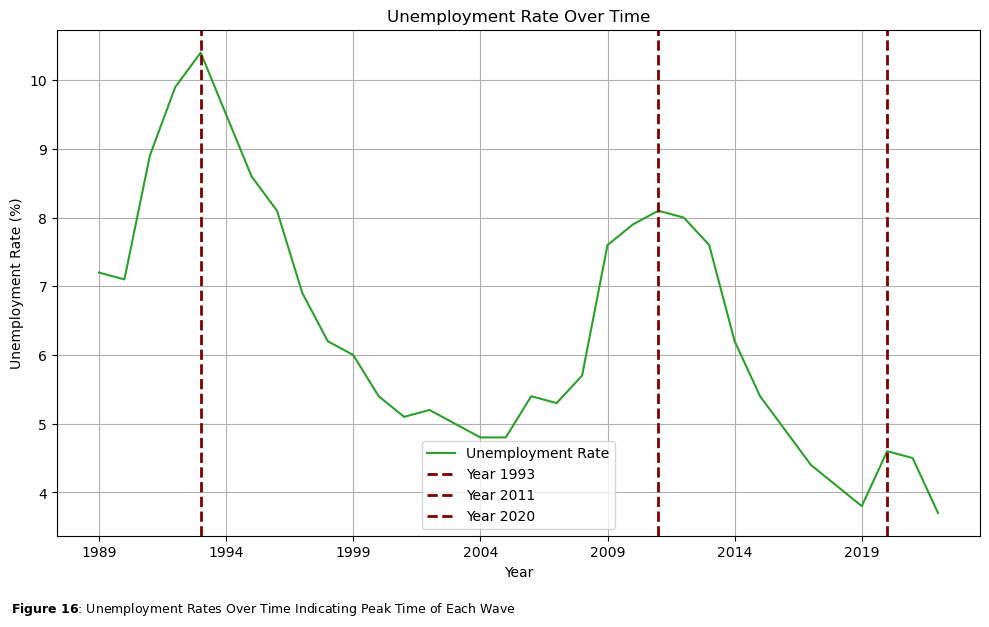

In [66]:


# Plot a line graph for the Unemployment Rate
plt.figure(figsize=(10, 6))
plt.plot(unemployment_df['Year'], unemployment_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')

# Highlight years 1992, 2010, and 2020 in maroon
highlight_years = [1993, 2011, 2020]
highlight_color = 'maroon'
for year in highlight_years:
    plt.axvline(x=year, color=highlight_color, linestyle='--', label=f'Year {year}', linewidth=2)

plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(unemployment_df['Year'][::5])
plt.text(-0.05, -0.15, r'$\bf{Figure\ 16}$: Unemployment Rates Over Time Indicating Peak Time of Each Wave', transform=plt.gca().transAxes, fontsize=9, color='black')
plt.show()

#### 2.3.3 Estimating the past recession time from inflation rate


In Figure 17, the line graph illustrates the fluctuation in the UK's annual inflation rate over time. it highlights two distinct inflation rates of 8% in 1991 and 2022, denoted by maroon dashed lines, and an inflation rate of 3.9% indicated by the green dashed line. These specific inflation rates act as turning points for economic conditions.


An inflation rate of 8%, observed in 1991 and 2022, typically signifies periods of increased price levels, which may lead to decreased purchasing power for individuals, potentially impacting their quality of life and  economic stability. On the other hand, an inflation rate of 3.9% indicates a more stable economic environment, although it remains higher than the period from 1994 to 2019. 

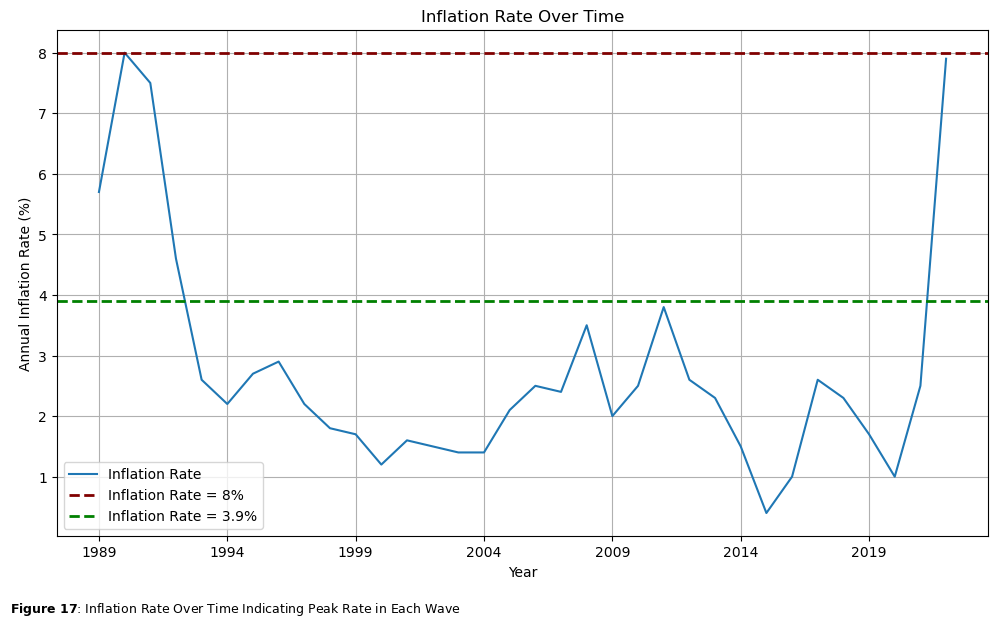

In [67]:

# Create a line graph for the Inflation Rate
plt.figure(figsize=(10, 6))
plt.plot(inflation_df['Year'], inflation_df['Inflation Rate'], label='Inflation Rate', color='#1f77b4')

# Highlight an inflation rate of 8%
highlight_inflation_rate_8 = 8
plt.axhline(y=highlight_inflation_rate_8, color='maroon', linestyle='--', label=f'Inflation Rate = {highlight_inflation_rate_8}%', linewidth=2)

# Highlight an inflation rate of 3.9%
highlight_inflation_rate_3_9 = 3.9
plt.axhline(y=highlight_inflation_rate_3_9, color='green', linestyle='--', label=f'Inflation Rate = {highlight_inflation_rate_3_9}%', linewidth=2)

plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Inflation Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Set the x-axis ticks to show years with a 5-year gap
years_with_5_gap = inflation_df['Year'].iloc[::5]
plt.xticks(years_with_5_gap)

# Add the figure label with only "Figure 17" in bold
plt.text(-0.05, -0.15, r'$\bf{Figure\ 17}$: Inflation Rate Over Time Indicating Peak Rate in Each Wave', transform=plt.gca().transAxes, fontsize=9, color='black')

plt.show()


#### 2.3.4  recession time based on inflation rate and unemployment rate jointly



In Figure 18, the combined line graphs presents a comprehensive view of the UK's unemployment and inflation rates over the years. It highlights significant years, including 1990, 1993, 2008, 2011, 2019, and 2022, represented by maroon dashed lines, which serve as key points in understanding the economic status of the UK. 

The coexistence of high unemployment rates and inflation peaks in these years implies economic challenges that may have experienced on people's lives and the economy. These periods could be associated with decreased job opportunities, reduced purchasing power, and economic instability. 

Table 9 represents the three distinct recession periods in UK history, estimated based on GDP growth rate and the combination of inflation and unemployment rates. The color-coded table and Figure 19 shows a visual representation of these recession times.



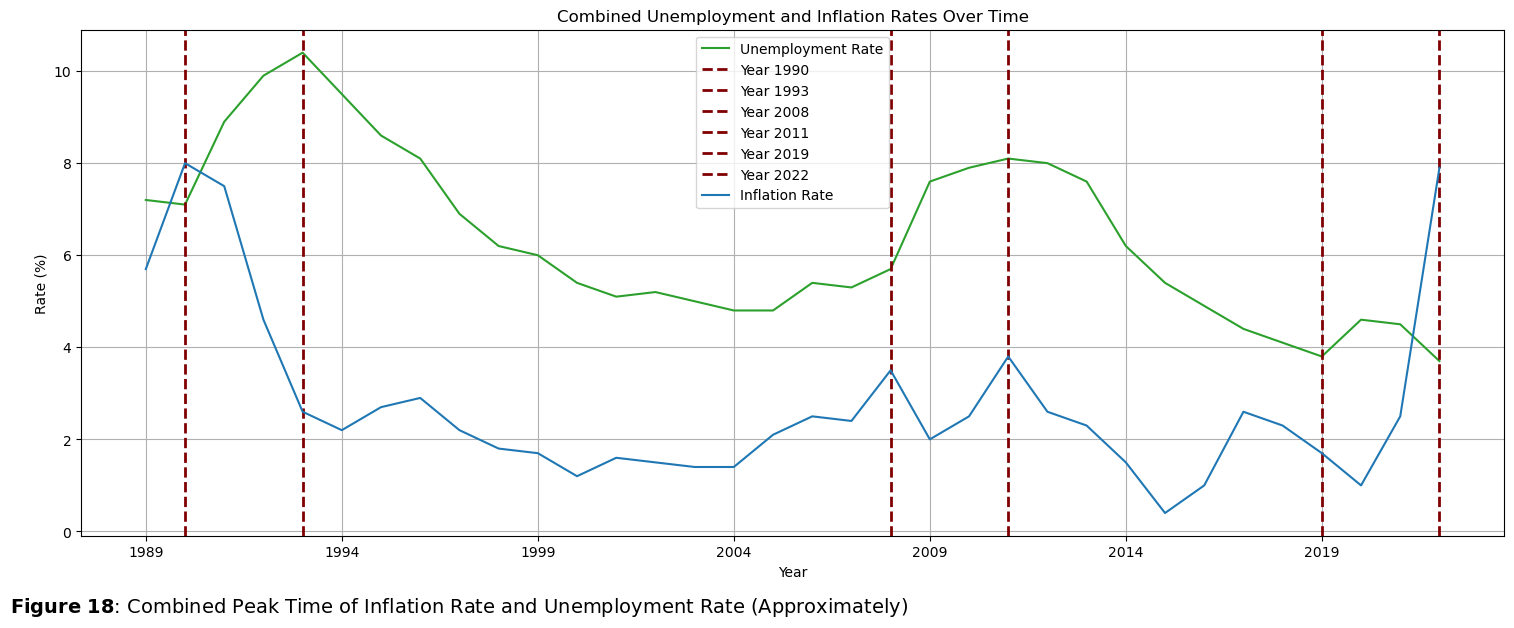

In [9]:
# Create a figure for the combined plot
plt.figure(figsize=(15, 6))

# Plot the Unemployment Rate
plt.plot(unemployment_df['Year'], unemployment_df['Unemployment Rate'], label='Unemployment Rate', color='#2ca02c')

# Highlight years 1992, 2010, and 2020 in maroon
highlight_years = [1990, 1993, 2008, 2011, 2019, 2022]
highlight_color = 'maroon'
for year in highlight_years:
    plt.axvline(x=year, color=highlight_color, linestyle='--', label=f'Year {year}', linewidth=2)

# Create a line graph for the Inflation Rate
plt.plot(inflation_df['Year'], inflation_df['Inflation Rate'], label='Inflation Rate', color='#1f77b4')

plt.title('Combined Unemployment and Inflation Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')  
plt.legend()
plt.tight_layout()
plt.xticks(unemployment_df['Year'][::5])
plt.text(-0.05, -0.15, r'$\bf{Figure\ 18}$: Combined Peak Time of Inflation Rate and Unemployment Rate (Approximately)', transform=plt.gca().transAxes, fontsize=14, color='black')


plt.show()


##### 2.3.5 Final Estimation of recession periods based on all economic indicators.

The Employment Rate is excluded from the estimation, as both Employment and Unemployment rates refer to a similar metric. Summarizing the findings from Sections 2.3.3 and 2.3.4 in Table 9 and visually illustrating them in Figure 19, the most suitable recession estimation years are 1990-1991, 2007-2008, and 2020. Summarising, it suggests that two color stacked bars (Figure 19) in 1990-1991, 2008-2009, and 2020 would have been the hardest times that people in the UK experienced in the past three decades. 

Interestingly, these findings align with officially published technical recession times in the UK, as reported by reputable sources such as imf.org, parliament.uk, and ons.gov.uk.



,Year,Recession Measured On
0,1990,GDP Rate
1,1991,GDP Rate
2,2008,GDP Rate
3,2009,GDP Rate
4,2020,GDP Rate
5,1990,Both Unemployment and Inflation
6,1991,Both Unemployment and Inflation
7,1992,Both Unemployment and Inflation
8,1993,Both Unemployment and Inflation
9,2008,Both Unemployment and Inflation


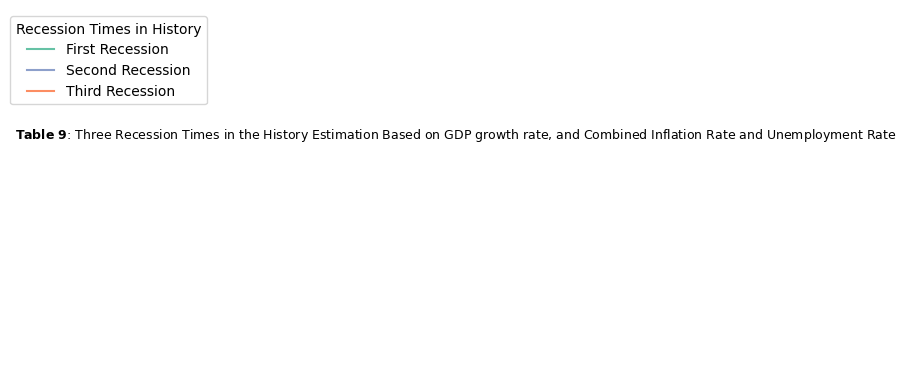

In [10]:


# Create a DataFrame
data = {
    'Year': [1990, 1991, 2008, 2009, 2020,  1990, 1991, 1992, 1993, 2008, 2009, 2010, 2011, 2019, 2020, 2021, 2022],
    'Recession Measured On': ['GDP Rate', 'GDP Rate', 'GDP Rate', 'GDP Rate', 'GDP Rate',
                           
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation', 
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation', 
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation', 
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation', 
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation', 
                           'Both Unemployment and Inflation', 'Both Unemployment and Inflation']
}

df = pd.DataFrame(data)

# Select specific rows based on year and 'Recession Based On'
selected_rows1 = df[(df['Year'].isin([1990, 1991])) & (df['Recession Measured On'] == 'GDP Rate')]
selected_rows2 = df[(df['Year'].isin([2008, 2009])) & (df['Recession Measured On'] == 'GDP Rate')]
selected_rows3 = df[(df['Year'].isin([2020])) & (df['Recession Measured On'] == 'GDP Rate')]


selected_rows4 = df[(df['Year'].isin([1990, 1991, 1992, 1993])) & (df['Recession Measured On'] == 'Both Unemployment and Inflation')]
selected_rows5 = df[(df['Year'].isin([2008, 2009, 2010, 2011])) & (df['Recession Measured On'] == 'Both Unemployment and Inflation')]
selected_rows6 = df[(df['Year'].isin([2019, 2020, 2021, 2022])) & (df['Recession Measured On'] == 'Both Unemployment and Inflation')]

# Create a list of selected row indices
selected_rows_1 = selected_rows1.index.tolist()  + selected_rows4.index.tolist() 
colors1 = {index: '#66c2a5' for index in selected_rows_1}
selected_rows_2 = selected_rows2.index.tolist()  + selected_rows5.index.tolist()
colors2 = {index: '#8da0cb' for index in selected_rows_2}
selected_rows_3 = selected_rows3.index.tolist()  + selected_rows6.index.tolist()

# Create a dictionary to specify colours for selected rows
colors3 = {index: '#fc8d62' for index in selected_rows_3}

# Merge the colour dictionaries
colors = {}
colors.update(colors1)
colors.update(colors2)
colors.update(colors3)

# Create a legend
legend = {
    'First Recession': '#66c2a5',
    'Second Recession': '#8da0cb',
    'Third Recession': '#fc8d62'
}

# Background colours to the DataFrame based on the chosen colours
styled_df = df.style.apply(lambda row: [f'background-color: {colors.get(row.name, "white")}' for _ in row], axis=1)

# Display the styled DataFrame
display(styled_df)

# Display the legend
for color, hex_code in legend.items():
    plt.plot([], [], color=hex_code, label=color)

# Set the location of the legend using custom coordinates (x, y)
plt.legend(title='Recession Times in History', loc='upper right', bbox_to_anchor=(.4, 1))

# Remove the axis , customising for this dataframe
plt.axis('off')
plt.text(-0.001, .65, r'$\bf{Table\ 9}$: Three Recession Times in the History Estimation Based on GDP growth rate, and Combined Inflation Rate and Unemployment Rate', transform=plt.gca().transAxes, fontsize=9, color='black')

plt.show()



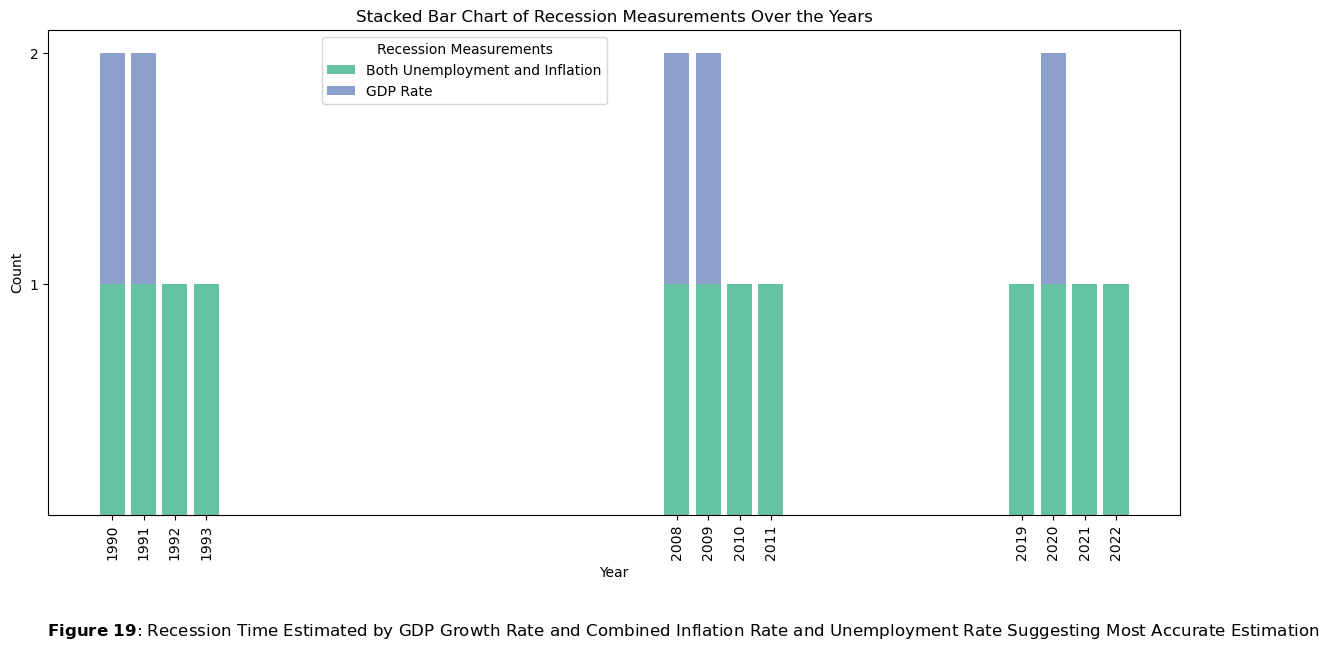

In [33]:


# Group the data by "Year" and "Recession Measured On" 
recession_counts = df.groupby(['Year', 'Recession Measured On']).size().unstack(fill_value=0)

# Define colors for the bars
colors = ['#66c2a5', '#8da0cb', '#fc8d62']

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot each bar separately and stack them
bottom = None
for recession_type, color in zip(recession_counts.columns, colors):
    plt.bar(recession_counts.index, recession_counts[recession_type], label=recession_type, color=color, bottom=bottom)
    if bottom is None:
        bottom = recession_counts[recession_type].values
    else:
        bottom += recession_counts[recession_type].values

# Set the title of the chart
plt.title('Stacked Bar Chart of Recession Measurements Over the Years')

# Set labels for the x and y axes
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend
legend = plt.legend(title='Recession Measurements')

# Set the location of the legend
legend.set_bbox_to_anchor((.5, 1))  

# Set y-ticks to display only 1 and 2
plt.yticks([1, 2])

# Show the chart
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(recession_counts.index[::1])
plt.text(-0.001, -.25, r'$\bf{Figure\ 19}$: Recession Time Estimated by GDP Growth Rate and Combined Inflation Rate and Unemployment Rate Suggesting Most Accurate Estimation', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.show()


#### 2.3.6 Estimating most stable time in the UK
As discussed in sections 2.3.1 to 2.3.4, the United Kingdom encountered some of its most challenging economic periods. In this brief section, the focus will be on examining the most stable times that the UK has experienced in the past three decades 

Figure 20 presents a bar chart that provides a visual representation of the historically lowest levels observed for both inflation and unemployment rates colour in grey. Figure 21 illustrates the healthy postive GDP growth rates. 

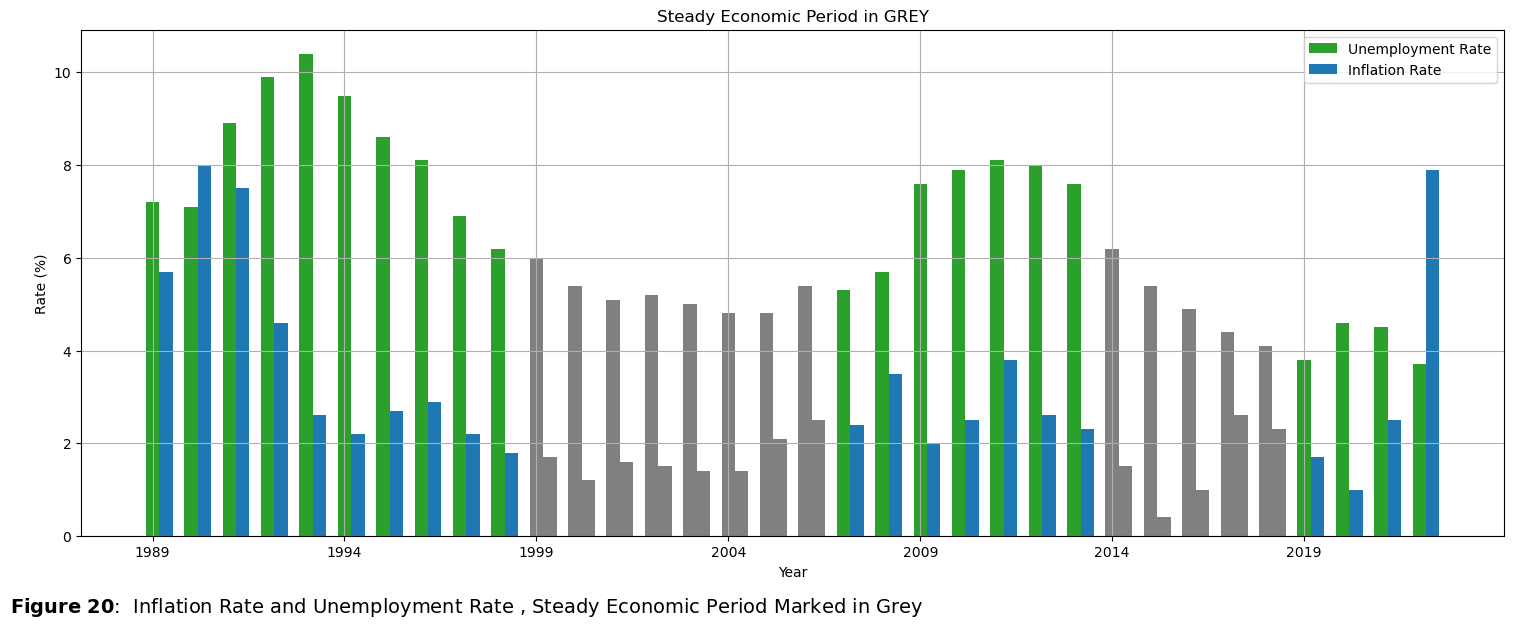

In [11]:

# Create a figure 
plt.figure(figsize=(15, 6))

# Bar width
bar_width = 0.35

# Set the x-axis positions for the bars
years = unemployment_df['Year']

# Years to be highlighted in grey
highlighted_years = [ 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2014, 2015, 2016, 2017, 2018]

# Change the color to grey for highlighted years
colors = ['#2ca02c' if year not in highlighted_years else 'grey' for year in years]
plt.bar(years, unemployment_df['Unemployment Rate'], bar_width, label='Unemployment Rate', color=colors)

# Plot colour selected as required
colors = ['#1f77b4' if year not in highlighted_years else 'grey' for year in years]
plt.bar(years + bar_width, inflation_df['Inflation Rate'], bar_width, label='Inflation Rate', color=colors)

plt.title('Steady Economic Period in GREY')
plt.xlabel('Year')
plt.ylabel('Rate (%)')  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(years[::5])
plt.text(-0.05, -0.15, r'$\bf{Figure\ 20}$:  Inflation Rate and Unemployment Rate , Steady Economic Period Marked in Grey', transform=plt.gca().transAxes, fontsize=14, color='black')


plt.show()


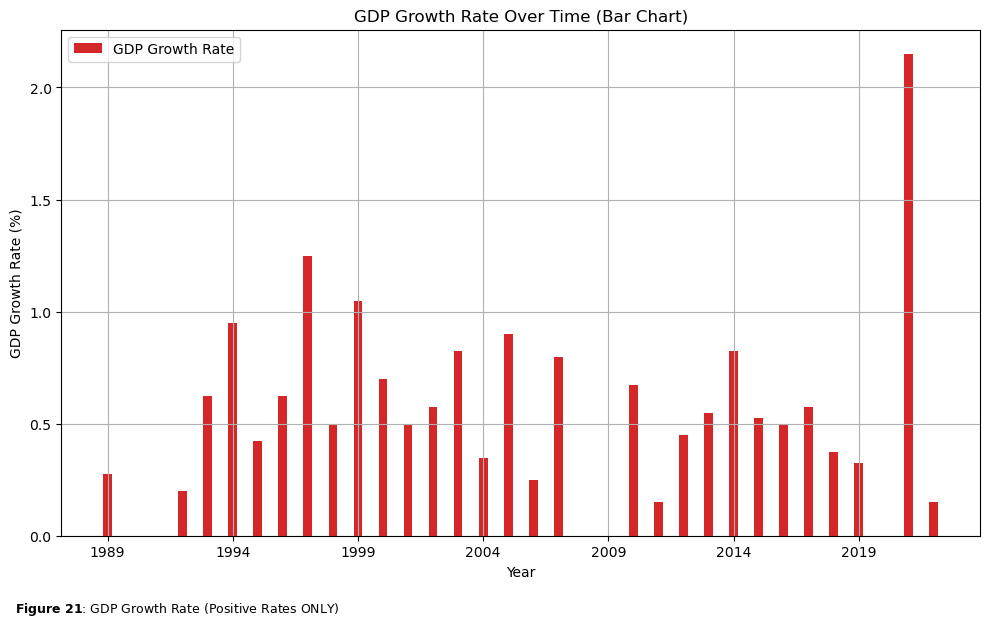

In [71]:
# Define the years what is required
highlighted_years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2014, 2015, 2016, 2017, 2018]

# Create a bar chart 
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Set the x-axis positions 
years = gdp_df['Year']

# Plot  bars with hatch pattern only for positives
hatches = ['//' if year in highlighted_years and gdp > 0 else '' for year, gdp in zip(years, gdp_df['GDP Growth Rate'])]

# Avoid negetive y axis with 'else'
plt.bar(years, [gdp if gdp > 0 else 0 for gdp in gdp_df['GDP Growth Rate']], bar_width, label='GDP Growth Rate', color='#d62728', hatch=hatches)

plt.title('GDP Growth Rate Over Time (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(years[::5])
plt.text(-0.05, -0.15, r'$\bf{Figure\ 21}$: GDP Growth Rate (Positive Rates ONLY)', transform=plt.gca().transAxes, fontsize=9, color='black')

plt.show()


#### 2.3.7 Interpretion from findings: People's quality of Life

The UK may have faced its most demanding economic challenges during three distinct periods: from 1990 to 1992, from 2008 to 2009 and 2020. These years could have been characterized by significant economic difficulties and hardships that might have deeply impacted the people in the UK. In these 3 challenging periods, people in the UK would have had to adapt to economic uncertainty, make significant lifestyle adjustments, and deal with the stress of financial instability. 

The periods from 1999 to 2006 and from 2014 to 2018 stand out as the most stable and economically prosperous times in the UK's recent history. During these years, the country enjoyed a period of remarkable stability, characterized by consistently low levels of inflation and unemployment rates. This economic stability would have had a positive impact on the people in the UK

In summary, the people of the UK and the nation as a whole may have enjoyed a period of stability and prosperity, experiencing a good quality of life compared to tougher times

## 3 Limitations and Conclusion



### 3.1 Limitations

The project work is subject to a set of inherent limitations that are worth noting


1. Economic estimations are typically multifactorial, but this analysis considered only four indicators.
2. Assumptions made in the analysis may not be perfect.
3. To observe more comprehensive trend patterns, a longer timeframe is necessary.
4. Quality of life depends on various factors beyond job losses and price increases.
5. The analysis is confined to historical data and does not offer predictions for the future.
6. Estimations are based on correlation have their own limitations.

### 3.2 Conclusion

In summary, the trends of economic indicators reveal a decreasing trend in unemployment and inflation rates, along with a steady trend in GDP growth. These overall trends are favorable for the UK economy and the well-being of its people.

Interconnections between economic indicators have been identified. A direct relationship is observed between the employment rate and inflation rate, meaning that as inflation rates increase, unemployment rates to rise as well. Conversely, an inverse relationship is noted between the inflation rate and GDP growth rate, indicating that higher inflation may lead to lower GDP growth. Similarly, there is an inverse relationship between GDP growth and unemployment rates, although these relationships are relatively weak. GDP growth rate  provides negligeable indication of unemployment trends.

The UK faced significant economic challenges in the early 1990s, during the 2008 financial crisis, and in 2020, which likely had profound impacts on its citizens. These findings align with the identification of technical recession periods. However, the periods from 1999 to 2006 and 2014 to 2018 emerged as exceptionally stable and prosperous times, marked by low inflation and unemployment rates. Overall, the UK experienced both challenging and prosperous phases, contributing to variations in the quality of life for its people.

## 4 Reference

Refer the README file